In [1]:
pip install clickhouse-connect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

import clickhouse_connect

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Make sure wide DataFrames don't wrap
pd.set_option("display.width", None)

# Show the full content of each column (no '...')
pd.set_option("display.max_colwidth", None)

In [8]:
client = clickhouse_connect.get_client(
    host='yaujulxk39.eastus2.azure.clickhouse.cloud',      # or server IP
    port=8443,             # HTTP port (default)
    username='default',
    password='~gZjRLjjOJh1i',
    database='Competitive_Analysis'
)

#dbs = client.query("SHOW TABLES")
#print([row[0] for row in dbs.result_rows])


In [5]:
drg_emb = pd.read_excel('/content/sample_data/DRG Embedding.xlsx')
drg_emb["ADRG"] = drg_emb["ADRG"].astype(str)
drg_emb.head(1)

,ADRG,DRG_emb
0,871,"[0.9938523118188436, 0.29082616799217953, 0.7965782520464032, 0.3535749080543439, 0.1896460571441283, 0.7519008192902751, 0.63736571217597, 0.8123749498605328, 0.2832268072942574, 0.25899391887112355, 0.655474100989501, 0.537308514729017, 0.9420410533291593, 0.1318489249372624, 0.669284354612134, 0.6681255725958664, 0.9620773804726782, 0.12954873368243314, 0.657105539594009, 0.22682460885083366, 0.4791225692117087, 0.49309723496575697, 0.4946384129782371, 0.3025543706327187, 0.45669777244583276, 0.1416149074734987, 0.4315795204654108, 0.818337529216165, 0.7055141235286191, 0.1971685168951811, 0.15733752343731178, 0.6726000335248898, 0.5292965034323673, 0.24509368605980253, 0.6457373409184167, 0.6726318007080646, 0.333744069307248, 0.3488400335744245, 0.22203467567681334, 0.0384954267516856, 0.186205001183546, 0.15540954252858208, 0.6608972450268089, 0.8246239513981989, 0.7695827876442596, 0.14026522398437447, 0.2870075766371557, 0.3600637821246464, 0.22400096678188197, 0.14082324965606674, 0.2646058059788019, 0.4501149065589306, 0.48976788596548493, 0.9552179119142286, 0.6959195088184877, 0.330872369436916, 0.3866118614913484, 0.7746866903779821, 0.517360003189088, 0.3728807611515079, 0.07651781542787284, 0.4674582839625795, 0.6660688871142403, 0.9141776145973332]"


In [6]:
import ast
import numpy as np

def parse_and_convert_to_float32(x):
    if isinstance(x, str):
        x = ast.literal_eval(x)   # string → list
    return np.asarray(x, dtype=np.float32)

drg_emb['DRG_emb'] = drg_emb['DRG_emb'].apply(parse_and_convert_to_float32)
drg_embedding_map = dict(zip(drg_emb['ADRG'], drg_emb['DRG_emb']))

drg_emb.head(1)

,ADRG,DRG_emb
0,871,"[0.9938523, 0.29082617, 0.7965782, 0.3535749, 0.18964605, 0.7519008, 0.6373657, 0.81237495, 0.28322682, 0.25899392, 0.6554741, 0.5373085, 0.94204104, 0.13184893, 0.66928434, 0.66812557, 0.9620774, 0.12954873, 0.65710557, 0.22682461, 0.47912258, 0.49309725, 0.4946384, 0.30255437, 0.45669776, 0.14161491, 0.43157953, 0.8183375, 0.70551413, 0.19716851, 0.15733752, 0.67260003, 0.5292965, 0.24509369, 0.64573735, 0.6726318, 0.33374408, 0.34884003, 0.22203468, 0.038495425, 0.186205, 0.15540954, 0.66089725, 0.82462394, 0.7695828, 0.14026523, 0.28700757, 0.3600638, 0.22400096, 0.14082325, 0.26460582, 0.4501149, 0.48976788, 0.9552179, 0.6959195, 0.33087236, 0.38661185, 0.7746867, 0.51736003, 0.37288076, 0.07651781, 0.46745828, 0.6660689, 0.9141776]"


In [9]:
# ---- Query ----
df_hum = client.query_df("""
    SELECT *
    FROM Competitive_Analysis.DRGHistoricalReviewInformation
    WHERE Client = 'Hum'
""")

In [ ]:
print(df_hum .shape)

print(df_hum['InitialDenialType'].value_counts())

df_hum['InitialDeterminationDate_copy'] = df_hum['InitialDeterminationDate']

print(df_hum['Control_ID'].value_counts().sort_values(ascending=False))

# 1️⃣ Convert to datetime
df_hum['InitialDeterminationDate_copy'] = pd.to_datetime(
    df_hum['InitialDeterminationDate_copy'],
    errors='coerce'
)

# 2️⃣ Sort by latest date
df_sorted = df_hum.sort_values('InitialDeterminationDate_copy', ascending=False)

# 3️⃣ Keep latest record per ClaimID
df_latest = df_sorted.drop_duplicates(subset='Control_ID', keep='first')
print(df_latest.shape)

df_latest['len_adrg'] = df_latest['ADRG'].astype(str).str.len()

df_hum = df_latest.copy()

# Step 1: Normalize DRG and A_PDX
df_hum['ADRG'] =df_hum['ADRG'].astype(str).str.strip()
df_hum['PRIM_DX'] = df_hum['PRIM_DX'].astype(str).str.strip().str.upper()
df_hum['LOB'] = df_hum['LOB'].astype(str).str.strip().str.upper()
df_hum['PaymentType'] = df_hum['PaymentType'].str.strip().str.upper()

# Step 2: Ensure numeric fields are clean

df_hum['IDSavings'] = pd.to_numeric(df_hum['IDSavings'], errors='coerce').fillna(0)
df_hum['LOS'] = pd.to_numeric(df_hum['LOS'], errors='coerce').fillna(0)
df_hum['AGE'] = pd.to_numeric(df_hum['AGE'], errors='coerce').fillna(0)
df_hum['A_MCCCount'] = pd.to_numeric(df_hum['A_MCCCount'], errors='coerce').fillna(0).astype(int)
df_hum['A_CCCount'] = pd.to_numeric(df_hum['A_CCCount'], errors='coerce').fillna(0).astype(int)

df_hum = df_hum[df_hum["IDSavings"] < 650000].reset_index(drop=True)

print(df_hum.shape)

df_hum['InitialDeterminationStatus_Flag'] = df_hum['InitialDeterminationStatus'].map({
    'Approved': 0,
    'Denied': 1
})

df_hum['InitialDeterminationStatus'] = df_hum['InitialDeterminationStatus'].astype(str).str.strip().str.upper()

df_hum['AGE'] = (
    df_hum['AGE']
        .astype(str)
        .str.strip()
        #.replace('', pd.NA)
        .astype(float)
)

max_age = df_hum["AGE"].max()
# drop invalid ages
df_hum = df_hum[df_hum["AGE"].between(0, max_age)]

# convert to nullable int
df_hum['AGE'] = df_hum['AGE'].astype('Int64')
print(df_hum.shape)

df_hum['LOS'] = (
    df_hum['LOS']
        .astype(str)            # convert to string
        .str.strip()            # remove spaces
        #.replace('', pd.NA)     # replace '' with NaN
        .astype('float')        # convert safely
        .astype('Int64')        # convert to integer (nullable)
)

df_hum = df_hum[df_hum['LOS'] >=0]
print(df_hum.shape)

df1 = df_hum.copy()

adx_cols = [f"A_DX{i}" for i in range(2, 26)]
df1["A_DX_List"] = df1[adx_cols].values.tolist()
df1["A_DX_List"] = df1["A_DX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))


def clean_sdx_list(lst):
    cleaned = []
    for item in lst:
        item = str(item).upper().strip()               # normalize
        item = item.replace("- MCC", "")               # remove MCC
        item = item.replace("- CC", "")                # remove CC
        item = item.replace("MCC", "")                 # safety
        item = item.replace("CC", "")                  # safety
        cleaned.append(item.strip().replace("-", ""))  # final cleanup
    return cleaned
df1["A_DX_List_Clean"] = df1["A_DX_List"].apply(clean_sdx_list)


In [11]:
df1['len_adrg'] = df1['ADRG'].astype(str).str.len()
df1['len_adrg'].value_counts()

,count
len_adrg,
3,71551
4,987


In [12]:
df_hist_sub_hum_ms_drg = df1[~(df1['len_adrg']==4)].copy()
df_hist_sub_hum_ms_drg.shape

(71551, 287)

In [13]:
df1 = df_hist_sub_hum_ms_drg.copy()

adx_cols = [f"A_DX{i}" for i in range(2, 26)]
df1["A_DX_List"] = df1[adx_cols].values.tolist()
df1["A_DX_List"] = df1["A_DX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))


def clean_sdx_list(lst):
    cleaned = []
    for item in lst:
        item = str(item).upper().strip()               # normalize
        item = item.replace("- MCC", "")               # remove MCC
        item = item.replace("- CC", "")                # remove CC
        item = item.replace("MCC", "")                 # safety
        item = item.replace("CC", "")                  # safety
        cleaned.append(item.strip().replace("-", ""))  # final cleanup
    return cleaned
df1["A_DX_List_Clean"] = df1["A_DX_List"].apply(clean_sdx_list)

# ---------------------------------------------------------
# Step 1: Load MCC/CC Mapping File
# ---------------------------------------------------------
#mccandcclist_df = pd.read_excel(r"C:\Users\Arunkumara\Downloads\MCCCCList (1).xlsx")
mccandcclist_df = pd.read_excel(r"/content/sample_data/MCCCCList (1).xlsx")

mccandcclist_df['ICDCode'] = (
    mccandcclist_df['ICDCode']
    .astype(str)
    .str.strip()
    .str.upper()
)
mccandcclist = dict(zip(mccandcclist_df['ICDCode'], mccandcclist_df['MCCorCC']))
print(f"✅ Loaded MCC/CC list with {len(mccandcclist)} entries.")
mccandcclist_df.head()


def map_sdx_types(icd_list, lookup_dict):
    cleaned_list = []
    for code in icd_list:
        code_clean = str(code).strip().upper()  # normalize

        tag = lookup_dict.get(code_clean, "")  # MCC / CC / General
        cleaned_list.append(f"{code_clean} - {tag}")

    return cleaned_list

df1['A_DX_Type_list'] = df1['A_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))

import pandas as pd

def split_dx_types(dx_list):
    mcc, cc, sdx = [], [], []

    for dx in dx_list:
        dx_clean = dx.upper().strip()

        if dx_clean.endswith("MCC"):
            mcc.append(dx_clean.replace("- MCC", "").strip())
        elif dx_clean.endswith("CC"):
            cc.append(dx_clean.replace("- CC", "").strip())
        else:
            sdx.append(dx_clean.replace("-", "").strip())

    return pd.Series({
        "MCC_SDX": ",".join(mcc),
        "CC_SDX": ",".join(cc),
        "SDX": ",".join(sdx)
    })

# Apply to dataframe
df1[["MCC_SDX", "CC_SDX", "SDX"]] = df1["A_DX_Type_list"].apply(split_dx_types)
df1.head(1)



✅ Loaded MCC/CC list with 17913 entries.


,Payor,claimid,Client,Control_ID,Claim_Number,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,LOS,DISP_Code,ADRG,DischargeYear,DischargeMonth,AGE,A_CCCount,A_MCCCount,B_CCCount,B_MCCCount,LOB,MRREQ,MRREC,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_POA,A_POA2,A_POA3,A_POA4,A_POA5,A_POA6,A_POA7,A_POA8,A_POA9,A_POA10,A_POA11,A_POA12,A_POA13,A_POA14,A_POA15,A_POA16,A_POA17,A_POA18,A_POA19,A_POA20,A_POA21,A_POA22,A_POA23,A_POA24,A_POA25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,B_DISPCode,B_DenialCode,B_DRG,B_PRIMDX,B_DX2,B_DX3,B_DX4,B_DX5,B_DX6,B_DX7,B_DX8,B_DX9,B_DX10,B_DX11,B_DX12,B_DX13,B_DX14,B_DX15,B_DX16,B_DX17,B_DX18,B_DX19,B_DX20,B_DX21,B_DX22,B_DX23,B_DX24,B_DX25,B_POA,B_POA2,B_POA3,B_POA4,B_POA5,B_POA6,B_POA7,B_POA8,B_POA9,B_POA10,B_POA11,B_POA12,B_POA13,B_POA14,B_POA15,B_POA16,B_POA17,B_POA18,B_POA19,B_POA20,B_POA21,B_POA22,B_POA23,B_POA24,B_POA25,B_PX1,B_PX2,B_PX3,B_PX4,B_PX5,B_PX6,B_PX7,B_PX8,B_PX9,B_PX10,B_PX11,B_PX12,B_PX13,B_PX14,B_PX15,B_PX16,B_PX17,B_PX18,B_PX19,B_PX20,B_PX21,B_PX22,B_PX23,B_PX24,B_PX25,A_PRIMDX_Desc,A_DX2_Desc,A_DX3_Desc,A_DX4_Desc,A_DX5_Desc,A_DX6_Desc,A_DX7_Desc,A_DX8_Desc,A_DX9_Desc,A_DX10_Desc,A_DX11_Desc,A_DX12_Desc,A_DX13_Desc,A_DX14_Desc,A_DX15_Desc,A_DX16_Desc,A_DX17_Desc,A_DX18_Desc,A_DX19_Desc,A_DX20_Desc,A_DX21_Desc,A_DX22_Desc,A_DX23_Desc,A_DX24_Desc,A_DX25_Desc,A_PX1_Desc,A_PX2_Desc,A_PX3_Desc,A_PX4_Desc,A_PX5_Desc,A_PX6_Desc,A_PX7_Desc,A_PX8_Desc,A_PX9_Desc,A_PX10_Desc,A_PX11_Desc,A_PX12_Desc,A_PX13_Desc,A_PX14_Desc,A_PX15_Desc,A_PX16_Desc,A_PX17_Desc,A_PX18_Desc,A_PX19_Desc,A_PX20_Desc,A_PX21_Desc,A_PX22_Desc,A_PX23_Desc,A_PX24_Desc,A_PX25_Desc,B_PRIMDX_Desc,B_DX2_Desc,B_DX3_Desc,B_DX4_Desc,B_DX5_Desc,B_DX6_Desc,B_DX7_Desc,B_DX8_Desc,B_DX9_Desc,B_DX10_Desc,B_DX11_Desc,B_DX12_Desc,B_DX13_Desc,B_DX14_Desc,B_DX15_Desc,B_DX16_Desc,B_DX17_Desc,B_DX18_Desc,B_DX19_Desc,B_DX20_Desc,B_DX21_Desc,B_DX22_Desc,B_DX23_Desc,B_DX24_Desc,B_DX25_Desc,B_PX1_Desc,B_PX2_Desc,B_PX3_Desc,B_PX4_Desc,B_PX5_Desc,B_PX6_Desc,B_PX7_Desc,B_PX8_Desc,B_PX9_Desc,B_PX10_Desc,B_PX11_Desc,B_PX12_Desc,B_PX13_Desc,B_PX14_Desc,B_PX15_Desc,B_PX16_Desc,B_PX17_Desc,B_PX18_Desc,B_PX19_Desc,B_PX20_Desc,B_PX21_Desc,B_PX22_Desc,B_PX23_Desc,B_PX24_Desc,B_PX25_Desc,InitialDeterminationDate,InitialDenialType,InitialDeterminationStatus,IDSavings,AdjustedSavings,InitialDeterminationDate_copy,len_adrg,InitialDeterminationStatus_Flag,A_DX_List,A_DX_List_Clean,A_DX_Type_list,MCC_SDX,CC_SDX,SDX
0,Strat,1302244,Hum,HUPRMR-9500,820260010230509,PREPAY,01,12827.05,610445850,000065362U,ST ELIZABETH HEALTHCARE,5,02-TRNSF ACUTE CARE FAC,871,2025,12,79,9,8,9,8,MEP3I,2026-01-07 19:30:09,2026-01-08 23:19:51,A419,I21A1 - MCC,I469 - MCC,I4901 - MCC,I5033 - MCC,J189 - MCC,J690 - MCC,J9601 - MCC,R6521 - MCC,I3139 - CC,R579 - CC,I130 - CC,N179 - CC,Z7901,N189,D509,E039,F39,I429 - CC,I4720 - CC,I4820 - CC,E871 - CC,I319 - CC,I480,<NA>,Y,Y,N,N,Y,Y,Y,N,N,Y,N,Y,Y,<NA>,Y,Y,Y,Y,Y,N,Y,N,Y,Y,<NA>,0BH17EZ,5A1945Z,02HV33Z,03HY32Z,5A2204Z,5A09357,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,02-TRNSF ACUTE CARE FAC,<NA>,871,A419 - MCC,I21A1 - MCC,I469 - MCC,I4901 - MCC,I5033 - MCC,J189 - MCC,J690 - MCC,J9601 - MCC,R6521 - MCC,I3139 - CC,R579 - CC,I130 - CC,N179 - CC,Z7901,N189,D509,E039,F39,I429 - CC,I4720 - CC,I4820 - CC,E871 - CC,I319 - CC,I480,<NA>,Y,Y,N,N,Y,Y,Y,N,N,Y,N,Y,Y,<NA>,Y,Y,Y,Y,Y,N,Y,N,Y,Y,<NA>,0BH17EZ,5A1945Z,02HV33Z,03HY32Z,5A2204Z,5A09357,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Sepsis, unspecified organism",Myocardial infarction type 2,"Cardiac arrest, cause unspecified",Ventricular fibrillation,Acute on chronic diastolic (congestive) heart failure,"Pneumonia, unspecified organism"

In [14]:
selected_cols = [
    "Control_ID","PaymentType",	"Group_Type",	"Payments",	"Tax_ID",	"Provider_ID",	"HospitalName","DISP_Code","AGE","LOB",
     "LOS", "ADRG", "PRIM_DX","MCC_SDX", "CC_SDX", "SDX",

    "InitialDeterminationDate",
    "InitialDeterminationStatus", "IDSavings"
]

df_new = df1[selected_cols].copy()
df_new.shape

(71551, 19)

In [15]:
df_new["Status_binary"] = df_new["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})

df_new.head()

,Control_ID,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,DISP_Code,AGE,LOB,LOS,ADRG,PRIM_DX,MCC_SDX,CC_SDX,SDX,InitialDeterminationDate,InitialDeterminationStatus,IDSavings,Status_binary
0,HUPRMR-9500,PREPAY,01,12827.05,610445850,000065362U,ST ELIZABETH HEALTHCARE,02-TRNSF ACUTE CARE FAC,79,MEP3I,5,871,A419,"I21A1,I469,I4901,I5033,J189,J690,J9601,R6521","E871,I130,I319,I429,I4820,N179,R579","D509,E039,F39,I3139,I4720,I480,N189,Z7901",2026-01-14 14:37:37,APPROVED,0.0,1
1,HUPTMR-68009,POSTPAY,01,4782.47,730579286,730579286,ST JOHN MEDICAL CENTER,01-ROUTINE/HOME,56,MCD93,4,193,J189,"G9341,J9621,J9622","E870,J441","D539,D72829,E039,E1165,E8729,E876,F17210,F419,I480,R000,Z7901,Z79899,Z880,Z9981",2026-01-14 13:59:25,APPROVED,0.0,1
2,HUPTMR-68984,POSTPAY,01,6470.88,261214372,261214372,NEA BAPTIST MEMORIAL HOSPITAL,01-ROUTINE/HOME,33,MRO39,4,189,J9601,,"J4541,J45902,Z6841","D72829,E6601,E876,F17210,I10",2026-01-14 13:31:07,APPROVED,0.0,1
3,HUPTMR-69137,POSTPAY,01,8482.07,350593390,000021832C,DEACONESS HOSPITAL INC,01-ROUTINE/HOME,80,MRO39,8,190,J441,"G9341,J9622","I4892,J9611","E785,E876,F17210,I10,I2510,I4720,I4891,I493,R296,Z59811,Z59819,Z5982,Z5986,Z7982,Z79899,Z8674,Z96643,Z9981",2026-01-14 13:10:29,APPROVED,0.0,1
4,HUPTMR-69883,POSTPAY,01,7530.44,581954432,000098152,NORTHSIDE FORSYTH,"50-HOSPICE, HOME",57,MEP3I,5,055,C7931,,"C7800,C7951,D61818,E871,G834","C439,E1140,E785,F4322,G893,I10,K219,K5900,R339,R5381,Z515,Z66,Z7952,Z7982,Z7984,Z79891,Z79899,Z87891,Z880",2026-01-14 12:50:11,APPROVED,0.0,1


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")
def safe_to_dict(x):
    if isinstance(x, dict): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return {}
    return {}

def safe_embedding(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return None
    return None

pretrained_embedding['metadata'] = pretrained_embedding['metadata'].apply(safe_to_dict)
pretrained_embedding = pretrained_embedding.reset_index(drop=True)
meta_df = pd.json_normalize(pretrained_embedding.pop('metadata'))
pretrained_embedding = pd.concat([pretrained_embedding, meta_df], axis=1)

def norm_icd(x):
    return str(x).upper().replace('.', '').strip()

pretrained_embedding['id'] = pretrained_embedding['id'].astype(str).apply(norm_icd)
pretrained_embedding['embedding'] = pretrained_embedding['embedding'].apply(safe_embedding)

EMB_DIM = 512
icd_embedding_map = dict(zip(pretrained_embedding['id'], pretrained_embedding['embedding']))
icd_category_map  = dict(zip(pretrained_embedding['id'], pretrained_embedding['Category']))
icd_text_map      = dict(zip(pretrained_embedding['id'], pretrained_embedding['text']))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# --------------------------------------------------
# 1. Ensure embeddings are valid 512-d vectors
# --------------------------------------------------
def safe_embedding(emb, dim=512):
    arr = np.asarray(emb, dtype="float32")
    if arr.ndim != 1 or arr.shape[0] != dim:
        return np.zeros(dim, dtype="float32")
    return arr

pretrained_embedding['embedding'] = pretrained_embedding['embedding'].apply(safe_embedding)

# Stack to matrix (N, 512)
X_emb_512 = np.vstack(pretrained_embedding['embedding'].values)

print("Original shape:", X_emb_512.shape)

# --------------------------------------------------
# 2. Reduce 512 → 64 using PCA
# --------------------------------------------------
pca = PCA(n_components=64, random_state=42)
X_emb_64 = pca.fit_transform(X_emb_512)

print("Reduced shape:", X_emb_64.shape)

# --------------------------------------------------
# 3. Store back into DataFrame
# --------------------------------------------------
pretrained_embedding['embedding_64'] = list(X_emb_64)


Original shape: (74044, 512)
Reduced shape: (74044, 64)


In [18]:
icd_embedding_map_64 = dict(zip(pretrained_embedding['id'], pretrained_embedding['embedding_64']))

In [20]:
df_ml_new = df_new.copy()
df_ml_new.shape

(71551, 20)

In [ ]:
import numpy as np
import pandas as pd

embedding_dim = 64

# ---------------------------------------
# Helper: return embedding or zero vector
# ---------------------------------------
def get_embedding(code, emb_map, embedding_dim=64):
    if isinstance(code, str) and code in emb_map:
        return emb_map[code]
    return np.zeros(embedding_dim, dtype="float32")

# ---------------------------------------
# Map comma-separated ICD string → embeddings
# ---------------------------------------
def map_icd_embeddings(icd_str, emb_map, embedding_dim=64):
    if pd.isna(icd_str) or icd_str == "":
        return []

    codes = [
        c.strip().upper()
        for c in icd_str.split(",")
        if c.strip()
    ]

    return [get_embedding(c, emb_map, embedding_dim) for c in codes]

# ---------------------------------------
# Apply to dataframe
# ---------------------------------------
df_ml_new["MCC_Set_embeddings"] = df_ml_new["MCC_SDX"].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map_64, embedding_dim)
)

df_ml_new["CC_Set_embeddings"] = df_ml_new["CC_SDX"].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map_64, embedding_dim)
)

df_ml_new["SDX_Set_embeddings"] = df_ml_new["SDX"].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map_64, embedding_dim)
)

df_ml_new["PRIM_DX_emb"] = df_ml_new["PRIM_DX"].apply(
    lambda x: get_embedding(str(x).strip().upper(), icd_embedding_map_64, embedding_dim)
)

df_ml_new["DRG_emb"] = df_ml_new["ADRG"].apply(
    lambda x: get_embedding(str(x).strip().upper(), drg_embedding_map, embedding_dim)
)

df_ml_new.head(1)


In [43]:
# ============================================================
# BALANCED HEALTHCARE CLAIMS MODEL – FULL FIXED PIPELINE
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    recall_score, f1_score, classification_report
)

device = "cuda" if torch.cuda.is_available() else "cpu"

# ============================================================
# Dataset
# ============================================================
class HealthDataset(Dataset):
    def __init__(self, df, emb_dim=64):
        self.DRG = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df["DRG_emb"]]
        self.PRIM = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df["PRIM_DX_emb"]]

        self.MCC = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim)
                    for x in df["MCC_Set_embeddings"]]
        self.CC = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim)
                   for x in df["CC_Set_embeddings"]]
        self.SDX = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim)
                    for x in df["SDX_Set_embeddings"]]

        self.LOS = torch.tensor(df["LOS"].values, dtype=torch.float32)
        self.Payments = torch.tensor(df["Payments"].values, dtype=torch.float32)
        self.y = torch.tensor(df["Status_binary"].values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return {
            "DRG": self.DRG[idx],
            "PRIM": self.PRIM[idx],
            "MCC": self.MCC[idx],
            "CC": self.CC[idx],
            "SDX": self.SDX[idx],
            "LOS": self.LOS[idx],
            "Payments": self.Payments[idx],
            "y": self.y[idx],
        }

# ============================================================
# Custom collate (CRITICAL)
# ============================================================
def health_collate_fn(batch):
    return {
        "DRG": [b["DRG"] for b in batch],
        "PRIM": [b["PRIM"] for b in batch],
        "MCC": [b["MCC"] for b in batch],
        "CC": [b["CC"] for b in batch],
        "SDX": [b["SDX"] for b in batch],
        "LOS": torch.stack([b["LOS"] for b in batch]),
        "Payments": torch.stack([b["Payments"] for b in batch]),
        "y": torch.stack([b["y"] for b in batch]),
    }

# ============================================================
# Attention Pooling
# ============================================================
class AttentionPooling(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.query = nn.Parameter(torch.randn(emb_dim))
        self.key = nn.Linear(emb_dim, emb_dim)
        self.value = nn.Linear(emb_dim, emb_dim)

    def forward(self, X):
        if X.shape[0] == 0:
            return torch.zeros(self.query.shape[0], device=X.device)
        Q = self.query.unsqueeze(0)
        K = self.key(X)
        V = self.value(X)
        attn = torch.softmax(Q @ K.T / np.sqrt(K.shape[1]), dim=-1)
        return (attn @ V).squeeze(0)

# ============================================================
# Model
# ============================================================
class HealthNN(nn.Module):
    def __init__(self, emb_dim=64):
        super().__init__()
        self.mcc_attn = AttentionPooling(emb_dim)
        self.cc_attn = AttentionPooling(emb_dim)
        self.sdx_attn = AttentionPooling(emb_dim)

        self.fc1 = nn.Linear(emb_dim * 5 + 2, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, batch):
        X = torch.cat([
            torch.stack(batch["DRG"]),
            torch.stack(batch["PRIM"]),
            torch.stack([self.mcc_attn(x) for x in batch["MCC"]]),
            torch.stack([self.cc_attn(x) for x in batch["CC"]]),
            torch.stack([self.sdx_attn(x) for x in batch["SDX"]]),
            batch["LOS"].unsqueeze(1),
            batch["Payments"].unsqueeze(1),
        ], dim=1)

        x = F.relu(self.bn1(self.fc1(X)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.fc3(x))
        return self.out(x).squeeze(1)  # logits

# ============================================================
# Train / Val / Test Split
# ============================================================
df_train, df_temp = train_test_split(
    df_ml_new, test_size=0.1,
    stratify=df_ml_new["Status_binary"], random_state=42
)

df_val, df_test = train_test_split(
    df_temp, test_size=0.2,
    stratify=df_temp["Status_binary"], random_state=42
)

train_ds = HealthDataset(df_train)
val_ds = HealthDataset(df_val)
test_ds = HealthDataset(df_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, collate_fn=health_collate_fn)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False, collate_fn=health_collate_fn)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False, collate_fn=health_collate_fn)

# ============================================================
# Model + Loss (Imbalance aware)
# ============================================================
model = HealthNN(emb_dim=64).to(device)

pos = df_train["Status_binary"].sum()
neg = len(df_train) - pos
pos_weight = torch.tensor([neg / pos], device=device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

# ============================================================
# Training
# ============================================================
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
        optimizer.zero_grad()

        logits = model(batch)
        loss = criterion(logits, batch["y"])
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Validation
    model.eval()
    y_val, y_val_prob = [], []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
            logits = model(batch)
            y_val.append(batch["y"].cpu())
            y_val_prob.append(torch.sigmoid(logits).cpu())

    y_val = torch.cat(y_val)
    y_val_prob = torch.cat(y_val_prob)
    y_val_pred = (y_val_prob >= 0.5).int()

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Loss {total_loss/len(train_loader):.4f} | "
        f"Val Recall {recall_score(y_val, y_val_pred):.4f} | "
        f"Val F1 {f1_score(y_val, y_val_pred):.4f}"
    )

# ============================================================
# TEST EVALUATION + BALANCED THRESHOLD
# ============================================================
model.eval()
y_true, y_prob = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
        logits = model(batch)
        y_true.append(batch["y"].cpu())
        y_prob.append(torch.sigmoid(logits).cpu())

y_true = torch.cat(y_true).numpy()
y_prob = torch.cat(y_prob).numpy()

best_thr, best_bal = 0.5, 0.0

for t in np.linspace(0.05, 0.95, 300):
    y_pred = (y_prob >= t).astype(int)
    r0 = recall_score(y_true, y_pred, pos_label=0)
    r1 = recall_score(y_true, y_pred, pos_label=1)
    bal = (r0 + r1) / 2
    if bal > best_bal:
        best_bal, best_thr = bal, t

print("\n✅ Best Balanced Threshold:", round(best_thr, 4))
print("✅ Balanced Recall:", round(best_bal, 4))

y_pred = (y_prob >= 0.876).astype(int)

print("\n📊 FINAL TEST CLASSIFICATION REPORT\n")
print(classification_report(y_true, y_pred, digits=4))


Epoch 1/20 | Loss 0.1597 | Val Recall 0.5387 | Val F1 0.6867
Epoch 2/20 | Loss 0.1477 | Val Recall 0.7947 | Val F1 0.8582
Epoch 3/20 | Loss 0.1427 | Val Recall 0.6509 | Val F1 0.7733
Epoch 4/20 | Loss 0.1385 | Val Recall 0.8102 | Val F1 0.8727
Epoch 5/20 | Loss 0.1341 | Val Recall 0.7464 | Val F1 0.8399
Epoch 6/20 | Loss 0.1336 | Val Recall 0.7311 | Val F1 0.8265
Epoch 7/20 | Loss 0.1320 | Val Recall 0.7569 | Val F1 0.8396
Epoch 8/20 | Loss 0.1320 | Val Recall 0.7681 | Val F1 0.8452
Epoch 9/20 | Loss 0.1309 | Val Recall 0.6070 | Val F1 0.7468
Epoch 10/20 | Loss 0.1302 | Val Recall 0.7770 | Val F1 0.8593
Epoch 11/20 | Loss 0.1305 | Val Recall 0.8729 | Val F1 0.9034
Epoch 12/20 | Loss 0.1291 | Val Recall 0.6857 | Val F1 0.8011
Epoch 13/20 | Loss 0.1286 | Val Recall 0.7244 | Val F1 0.8263
Epoch 14/20 | Loss 0.1288 | Val Recall 0.5687 | Val F1 0.7153
Epoch 15/20 | Loss 0.1289 | Val Recall 0.8064 | Val F1 0.8698
Epoch 16/20 | Loss 0.1282 | Val Recall 0.6964 | Val F1 0.8098
Epoch 17/20 | Los

In [63]:

y_pred = (y_prob >= 0.55).astype(int)

print("\n📊 FINAL TEST CLASSIFICATION REPORT\n")
print(classification_report(y_true, y_pred, digits=4))


📊 FINAL TEST CLASSIFICATION REPORT

              precision    recall  f1-score   support

         0.0     0.2708    0.7558    0.3988       172
         1.0     0.9559    0.7222    0.8228      1260

    accuracy                         0.7263      1432
   macro avg     0.6134    0.7390    0.6108      1432
weighted avg     0.8736    0.7263    0.7719      1432



Confusion Matrix:
 [[130  42]
 [350 910]]


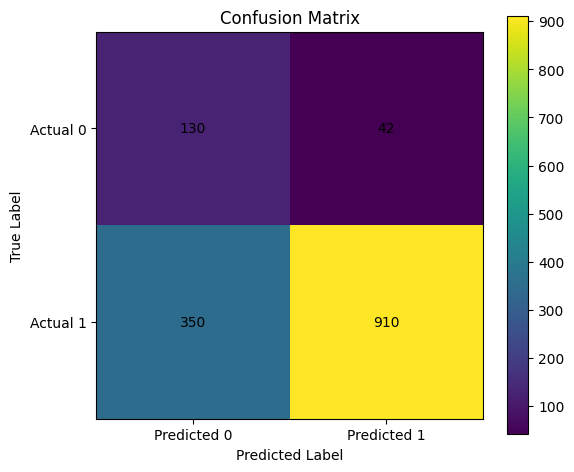

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:\n", cm)

# -----------------------------
# Plot Confusion Matrix
# -----------------------------
plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks([0, 1], ["Predicted 0", "Predicted 1"])
plt.yticks([0, 1], ["Actual 0", "Actual 1"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# Test

In [76]:
# ---- Query ----
df_h = client.query_df("""
    SELECT *
    FROM Competitive_Analysis.DRGHistoricalReviewInformation
    LIMIT 2000
""")

In [65]:
df_h.head()

,Payor,claimid,Client,Control_ID,Claim_Number,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,LOS,DISP_Code,ADRG,DischargeYear,DischargeMonth,AGE,A_CCCount,A_MCCCount,B_CCCount,B_MCCCount,LOB,MRREQ,MRREC,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_POA,A_POA2,A_POA3,A_POA4,A_POA5,A_POA6,A_POA7,A_POA8,A_POA9,A_POA10,A_POA11,A_POA12,A_POA13,A_POA14,A_POA15,A_POA16,A_POA17,A_POA18,A_POA19,A_POA20,A_POA21,A_POA22,A_POA23,A_POA24,A_POA25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,B_DISPCode,B_DenialCode,B_DRG,B_PRIMDX,B_DX2,B_DX3,B_DX4,B_DX5,B_DX6,B_DX7,B_DX8,B_DX9,B_DX10,B_DX11,B_DX12,B_DX13,B_DX14,B_DX15,B_DX16,B_DX17,B_DX18,B_DX19,B_DX20,B_DX21,B_DX22,B_DX23,B_DX24,B_DX25,B_POA,B_POA2,B_POA3,B_POA4,B_POA5,B_POA6,B_POA7,B_POA8,B_POA9,B_POA10,B_POA11,B_POA12,B_POA13,B_POA14,B_POA15,B_POA16,B_POA17,B_POA18,B_POA19,B_POA20,B_POA21,B_POA22,B_POA23,B_POA24,B_POA25,B_PX1,B_PX2,B_PX3,B_PX4,B_PX5,B_PX6,B_PX7,B_PX8,B_PX9,B_PX10,B_PX11,B_PX12,B_PX13,B_PX14,B_PX15,B_PX16,B_PX17,B_PX18,B_PX19,B_PX20,B_PX21,B_PX22,B_PX23,B_PX24,B_PX25,A_PRIMDX_Desc,A_DX2_Desc,A_DX3_Desc,A_DX4_Desc,A_DX5_Desc,A_DX6_Desc,A_DX7_Desc,A_DX8_Desc,A_DX9_Desc,A_DX10_Desc,A_DX11_Desc,A_DX12_Desc,A_DX13_Desc,A_DX14_Desc,A_DX15_Desc,A_DX16_Desc,A_DX17_Desc,A_DX18_Desc,A_DX19_Desc,A_DX20_Desc,A_DX21_Desc,A_DX22_Desc,A_DX23_Desc,A_DX24_Desc,A_DX25_Desc,A_PX1_Desc,A_PX2_Desc,A_PX3_Desc,A_PX4_Desc,A_PX5_Desc,A_PX6_Desc,A_PX7_Desc,A_PX8_Desc,A_PX9_Desc,A_PX10_Desc,A_PX11_Desc,A_PX12_Desc,A_PX13_Desc,A_PX14_Desc,A_PX15_Desc,A_PX16_Desc,A_PX17_Desc,A_PX18_Desc,A_PX19_Desc,A_PX20_Desc,A_PX21_Desc,A_PX22_Desc,A_PX23_Desc,A_PX24_Desc,A_PX25_Desc,B_PRIMDX_Desc,B_DX2_Desc,B_DX3_Desc,B_DX4_Desc,B_DX5_Desc,B_DX6_Desc,B_DX7_Desc,B_DX8_Desc,B_DX9_Desc,B_DX10_Desc,B_DX11_Desc,B_DX12_Desc,B_DX13_Desc,B_DX14_Desc,B_DX15_Desc,B_DX16_Desc,B_DX17_Desc,B_DX18_Desc,B_DX19_Desc,B_DX20_Desc,B_DX21_Desc,B_DX22_Desc,B_DX23_Desc,B_DX24_Desc,B_DX25_Desc,B_PX1_Desc,B_PX2_Desc,B_PX3_Desc,B_PX4_Desc,B_PX5_Desc,B_PX6_Desc,B_PX7_Desc,B_PX8_Desc,B_PX9_Desc,B_PX10_Desc,B_PX11_Desc,B_PX12_Desc,B_PX13_Desc,B_PX14_Desc,B_PX15_Desc,B_PX16_Desc,B_PX17_Desc,B_PX18_Desc,B_PX19_Desc,B_PX20_Desc,B_PX21_Desc,B_PX22_Desc,B_PX23_Desc,B_PX24_Desc,B_PX25_Desc,InitialDeterminationDate,InitialDenialType,InitialDeterminationStatus,IDSavings,AdjustedSavings
0,Strat,444188,DANVT,DVPT2022-02-28606,18463764,PostPay,01,14212.06,204993360,282746,CENTENNIAL HILLS HOSP MED CNTR,11,03-TRNSF TO SKILLED NURSING FAC,871,2021,11,78,4,5,4,2,MCR,2022-03-31 10:07:47,2022-04-17,A419,G9341 - MCC,J189 - MCC,J9601 - MCC,N170 - MCC,E870 - CC,E874 - CC,M6282 - CC,E872 - CC,D649,E1140,E1151,E1165,E785,E860,E875,I10,K7290,R6520 - MCC,Z20822,Z7902,Z79899,Z7984,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,<NA>,<NA>,<NA>,<NA>,<NA>,05HM33Z,B543ZZA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,03-TRNSF TO SKILLED NURSING FAC,801C,682,N170 - MCC,G9341 - MCC,J9601 - MCC,E870 - CC,E874 - CC,M6282 - CC,E872 - CC,D649,E1140,E1151,E1165,E785,E860,E875,I10,K7290,Z20822,Z7902,Z79899,Z7984,<NA>,<NA>,<NA>,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,1,1,1,<NA>,<NA>,<NA>,<NA>,<NA>,05HM33Z,B543ZZA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Sepsis, unspecified organism",Metabolic encephalopathy,"Pneumonia, unspecified organism",Acute respiratory failure with hypoxia,Acute kidney failure with tubular necrosis,Hyperosmolality and hypernatremia,Mixed disorder of acid-base balance,Rhabdomyolysis,Acidosis,"Anemia, unspecified","Type 2 diabetes mellitus with diabetic neuropathy, unspecified",Type 2 diabetes mellitus with diabetic peripheral angiopathy without gangrene

In [77]:
df1 = df_h.copy()

adx_cols = [f"A_DX{i}" for i in range(2, 26)]
df1["A_DX_List"] = df1[adx_cols].values.tolist()
df1["A_DX_List"] = df1["A_DX_List"].apply(lambda x: sorted([i for i in x if pd.notna(i)]))


def clean_sdx_list(lst):
    cleaned = []
    for item in lst:
        item = str(item).upper().strip()               # normalize
        item = item.replace("- MCC", "")               # remove MCC
        item = item.replace("- CC", "")                # remove CC
        item = item.replace("MCC", "")                 # safety
        item = item.replace("CC", "")                  # safety
        cleaned.append(item.strip().replace("-", ""))  # final cleanup
    return cleaned
df1["A_DX_List_Clean"] = df1["A_DX_List"].apply(clean_sdx_list)

# ---------------------------------------------------------
# Step 1: Load MCC/CC Mapping File
# ---------------------------------------------------------
#mccandcclist_df = pd.read_excel(r"C:\Users\Arunkumara\Downloads\MCCCCList (1).xlsx")
mccandcclist_df = pd.read_excel(r"/content/sample_data/MCCCCList (1).xlsx")

mccandcclist_df['ICDCode'] = (
    mccandcclist_df['ICDCode']
    .astype(str)
    .str.strip()
    .str.upper()
)
mccandcclist = dict(zip(mccandcclist_df['ICDCode'], mccandcclist_df['MCCorCC']))
print(f"✅ Loaded MCC/CC list with {len(mccandcclist)} entries.")
mccandcclist_df.head()


def map_sdx_types(icd_list, lookup_dict):
    cleaned_list = []
    for code in icd_list:
        code_clean = str(code).strip().upper()  # normalize

        tag = lookup_dict.get(code_clean, "")  # MCC / CC / General
        cleaned_list.append(f"{code_clean} - {tag}")

    return cleaned_list

df1['A_DX_Type_list'] = df1['A_DX_List_Clean'].apply(lambda x: map_sdx_types(x, mccandcclist))

import pandas as pd

def split_dx_types(dx_list):
    mcc, cc, sdx = [], [], []

    for dx in dx_list:
        dx_clean = dx.upper().strip()

        if dx_clean.endswith("MCC"):
            mcc.append(dx_clean.replace("- MCC", "").strip())
        elif dx_clean.endswith("CC"):
            cc.append(dx_clean.replace("- CC", "").strip())
        else:
            sdx.append(dx_clean.replace("-", "").strip())

    return pd.Series({
        "MCC_SDX": ",".join(mcc),
        "CC_SDX": ",".join(cc),
        "SDX": ",".join(sdx)
    })

# Apply to dataframe
df1[["MCC_SDX", "CC_SDX", "SDX"]] = df1["A_DX_Type_list"].apply(split_dx_types)
df1.head(1)



✅ Loaded MCC/CC list with 17913 entries.


,Payor,claimid,Client,Control_ID,Claim_Number,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,LOS,DISP_Code,ADRG,DischargeYear,DischargeMonth,AGE,A_CCCount,A_MCCCount,B_CCCount,B_MCCCount,LOB,MRREQ,MRREC,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_POA,A_POA2,A_POA3,A_POA4,A_POA5,A_POA6,A_POA7,A_POA8,A_POA9,A_POA10,A_POA11,A_POA12,A_POA13,A_POA14,A_POA15,A_POA16,A_POA17,A_POA18,A_POA19,A_POA20,A_POA21,A_POA22,A_POA23,A_POA24,A_POA25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,B_DISPCode,B_DenialCode,B_DRG,B_PRIMDX,B_DX2,B_DX3,B_DX4,B_DX5,B_DX6,B_DX7,B_DX8,B_DX9,B_DX10,B_DX11,B_DX12,B_DX13,B_DX14,B_DX15,B_DX16,B_DX17,B_DX18,B_DX19,B_DX20,B_DX21,B_DX22,B_DX23,B_DX24,B_DX25,B_POA,B_POA2,B_POA3,B_POA4,B_POA5,B_POA6,B_POA7,B_POA8,B_POA9,B_POA10,B_POA11,B_POA12,B_POA13,B_POA14,B_POA15,B_POA16,B_POA17,B_POA18,B_POA19,B_POA20,B_POA21,B_POA22,B_POA23,B_POA24,B_POA25,B_PX1,B_PX2,B_PX3,B_PX4,B_PX5,B_PX6,B_PX7,B_PX8,B_PX9,B_PX10,B_PX11,B_PX12,B_PX13,B_PX14,B_PX15,B_PX16,B_PX17,B_PX18,B_PX19,B_PX20,B_PX21,B_PX22,B_PX23,B_PX24,B_PX25,A_PRIMDX_Desc,A_DX2_Desc,A_DX3_Desc,A_DX4_Desc,A_DX5_Desc,A_DX6_Desc,A_DX7_Desc,A_DX8_Desc,A_DX9_Desc,A_DX10_Desc,A_DX11_Desc,A_DX12_Desc,A_DX13_Desc,A_DX14_Desc,A_DX15_Desc,A_DX16_Desc,A_DX17_Desc,A_DX18_Desc,A_DX19_Desc,A_DX20_Desc,A_DX21_Desc,A_DX22_Desc,A_DX23_Desc,A_DX24_Desc,A_DX25_Desc,A_PX1_Desc,A_PX2_Desc,A_PX3_Desc,A_PX4_Desc,A_PX5_Desc,A_PX6_Desc,A_PX7_Desc,A_PX8_Desc,A_PX9_Desc,A_PX10_Desc,A_PX11_Desc,A_PX12_Desc,A_PX13_Desc,A_PX14_Desc,A_PX15_Desc,A_PX16_Desc,A_PX17_Desc,A_PX18_Desc,A_PX19_Desc,A_PX20_Desc,A_PX21_Desc,A_PX22_Desc,A_PX23_Desc,A_PX24_Desc,A_PX25_Desc,B_PRIMDX_Desc,B_DX2_Desc,B_DX3_Desc,B_DX4_Desc,B_DX5_Desc,B_DX6_Desc,B_DX7_Desc,B_DX8_Desc,B_DX9_Desc,B_DX10_Desc,B_DX11_Desc,B_DX12_Desc,B_DX13_Desc,B_DX14_Desc,B_DX15_Desc,B_DX16_Desc,B_DX17_Desc,B_DX18_Desc,B_DX19_Desc,B_DX20_Desc,B_DX21_Desc,B_DX22_Desc,B_DX23_Desc,B_DX24_Desc,B_DX25_Desc,B_PX1_Desc,B_PX2_Desc,B_PX3_Desc,B_PX4_Desc,B_PX5_Desc,B_PX6_Desc,B_PX7_Desc,B_PX8_Desc,B_PX9_Desc,B_PX10_Desc,B_PX11_Desc,B_PX12_Desc,B_PX13_Desc,B_PX14_Desc,B_PX15_Desc,B_PX16_Desc,B_PX17_Desc,B_PX18_Desc,B_PX19_Desc,B_PX20_Desc,B_PX21_Desc,B_PX22_Desc,B_PX23_Desc,B_PX24_Desc,B_PX25_Desc,InitialDeterminationDate,InitialDenialType,InitialDeterminationStatus,IDSavings,AdjustedSavings,A_DX_List,A_DX_List_Clean,A_DX_Type_list,MCC_SDX,CC_SDX,SDX
0,Strat,444188,DANVT,DVPT2022-02-28606,18463764,PostPay,01,14212.06,204993360,282746,CENTENNIAL HILLS HOSP MED CNTR,11,03-TRNSF TO SKILLED NURSING FAC,871,2021,11,78,4,5,4,2,MCR,2022-03-31 10:07:47,2022-04-17,A419,G9341 - MCC,J189 - MCC,J9601 - MCC,N170 - MCC,E870 - CC,E874 - CC,M6282 - CC,E872 - CC,D649,E1140,E1151,E1165,E785,E860,E875,I10,K7290,R6520 - MCC,Z20822,Z7902,Z79899,Z7984,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,<NA>,<NA>,<NA>,<NA>,<NA>,05HM33Z,B543ZZA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,03-TRNSF TO SKILLED NURSING FAC,801C,682,N170 - MCC,G9341 - MCC,J9601 - MCC,E870 - CC,E874 - CC,M6282 - CC,E872 - CC,D649,E1140,E1151,E1165,E785,E860,E875,I10,K7290,Z20822,Z7902,Z79899,Z7984,<NA>,<NA>,<NA>,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,1,1,1,<NA>,<NA>,<NA>,<NA>,<NA>,05HM33Z,B543ZZA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Sepsis, unspecified organism",Metabolic encephalopathy,"Pneumonia, unspecified organism",Acute respiratory failure with hypoxia,Acute kidney failure with tubular necrosis,Hyperosmolality and hypernatremia,Mixed disorder of acid-base balance,Rhabdomyolysis,Acidosis,"Anemia, unspecified","Type 2 diabetes mellitus with diabetic neuropathy, unspecified",Type 2 diabetes m

In [78]:
import numpy as np
import pandas as pd

embedding_dim = 64
df_ml_new = df1.copy()

# ---------------------------------------
# Helper: return embedding or zero vector
# ---------------------------------------
def get_embedding(code, emb_map, embedding_dim=64):
    if isinstance(code, str) and code in emb_map:
        return emb_map[code]
    return np.zeros(embedding_dim, dtype="float32")

# ---------------------------------------
# Map comma-separated ICD string → embeddings
# ---------------------------------------
def map_icd_embeddings(icd_str, emb_map, embedding_dim=64):
    if pd.isna(icd_str) or icd_str == "":
        return []

    codes = [
        c.strip().upper()
        for c in icd_str.split(",")
        if c.strip()
    ]

    return [get_embedding(c, emb_map, embedding_dim) for c in codes]

# ---------------------------------------
# Apply to dataframe
# ---------------------------------------
df_ml_new["MCC_Set_embeddings"] = df_ml_new["MCC_SDX"].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map_64, embedding_dim)
)

df_ml_new["CC_Set_embeddings"] = df_ml_new["CC_SDX"].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map_64, embedding_dim)
)

df_ml_new["SDX_Set_embeddings"] = df_ml_new["SDX"].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map_64, embedding_dim)
)

df_ml_new["PRIM_DX_emb"] = df_ml_new["PRIM_DX"].apply(
    lambda x: get_embedding(str(x).strip().upper(), icd_embedding_map_64, embedding_dim)
)

df_ml_new["DRG_emb"] = df_ml_new["ADRG"].apply(
    lambda x: get_embedding(str(x).strip().upper(), drg_embedding_map, embedding_dim)
)

#df_ml_new.head(1)


In [79]:
# ============================================================
# UNSEEN DATA INFERENCE – SINGLE CELL
# ============================================================

import torch
from torch.utils.data import DataLoader
import numpy as np

# -----------------------------
# Dataset for unseen data
# -----------------------------
class HealthDatasetUnseen(torch.utils.data.Dataset):
    def __init__(self, df, emb_dim=64):
        self.DRG = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df["DRG_emb"]]
        self.PRIM = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df["PRIM_DX_emb"]]

        self.MCC = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim)
                    for x in df["MCC_Set_embeddings"]]
        self.CC = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim)
                   for x in df["CC_Set_embeddings"]]
        self.SDX = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim)
                    for x in df["SDX_Set_embeddings"]]

        self.LOS = torch.tensor(df["LOS"].values, dtype=torch.float32)
        self.Payments = torch.tensor(df["Payments"].values, dtype=torch.float32)

    def __len__(self):
        return len(self.LOS)

    def __getitem__(self, idx):
        return {
            "DRG": self.DRG[idx],
            "PRIM": self.PRIM[idx],
            "MCC": self.MCC[idx],
            "CC": self.CC[idx],
            "SDX": self.SDX[idx],
            "LOS": self.LOS[idx],
            "Payments": self.Payments[idx],
        }

# -----------------------------
# Collate function (same logic)
# -----------------------------
def health_collate_unseen(batch):
    return {
        "DRG": [b["DRG"] for b in batch],
        "PRIM": [b["PRIM"] for b in batch],
        "MCC": [b["MCC"] for b in batch],
        "CC": [b["CC"] for b in batch],
        "SDX": [b["SDX"] for b in batch],
        "LOS": torch.stack([b["LOS"] for b in batch]),
        "Payments": torch.stack([b["Payments"] for b in batch]),
    }

# -----------------------------
# Create loader
# -----------------------------

df_unseen = df_ml_new.copy()

unseen_ds = HealthDatasetUnseen(df_unseen)
unseen_loader = DataLoader(
    unseen_ds,
    batch_size=64,
    shuffle=False,
    collate_fn=health_collate_unseen
)

# -----------------------------
# Inference
# -----------------------------
model.eval()
all_probs = []

with torch.no_grad():
    for batch in unseen_loader:
        batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
        logits = model(batch)
        probs = torch.sigmoid(logits)
        all_probs.append(probs.cpu())

all_probs = torch.cat(all_probs).numpy()

# -----------------------------
# Apply balanced threshold
# -----------------------------
all_preds = (all_probs >= best_thr).astype(int)

# -----------------------------
# Attach to dataframe
# -----------------------------
df_unseen = df_unseen.copy()
df_unseen["pred_probability"] = all_probs
df_unseen["pred_label"] = all_preds
#["pred_decision"] = np.where(all_preds == 1, "RISK / REVIEW", "NORMAL")

#df_unseen.head()


In [ ]:
df_unseen.head(1)

In [84]:
cols_to_keep = [
    "Payor","claimid","Client","Control_ID","Claim_Number","PaymentType","Group_Type",
    "Payments","Tax_ID","Provider_ID","HospitalName","LOS","DISP_Code","ADRG",
    "DischargeYear","DischargeMonth","AGE",
    "A_CCCount","A_MCCCount","B_CCCount","B_MCCCount",
    "LOB","MRREQ","MRREC",
    "PRIM_DX",
    "A_DX2","A_DX3","A_DX4","A_DX5","A_DX6","A_DX7","A_DX8","A_DX9","A_DX10",
    "A_DX11","A_DX12","A_DX13","A_DX14","A_DX15","A_DX16","A_DX17","A_DX18","A_DX19","A_DX20",
    "A_DX21","A_DX22","A_DX23","A_DX24","A_DX25",
    "A_POA","A_POA2","A_POA3","A_POA4","A_POA5","A_POA6","A_POA7","A_POA8","A_POA9","A_POA10",
    "A_POA11","A_POA12","A_POA13","A_POA14","A_POA15","A_POA16","A_POA17","A_POA18","A_POA19","A_POA20",
    "A_POA21","A_POA22","A_POA23","A_POA24","A_POA25",
    "A_PX1","A_PX2","A_PX3","A_PX4","A_PX5","A_PX6","A_PX7","A_PX8","A_PX9","A_PX10",
    "A_PX11","A_PX12","A_PX13","A_PX14","A_PX15","A_PX16","A_PX17","A_PX18","A_PX19","A_PX20",
    "A_PX21","A_PX22","A_PX23","A_PX24","A_PX25",
    "InitialDeterminationDate","InitialDenialType","InitialDeterminationStatus",
    "IDSavings","AdjustedSavings",
    "pred_probability","pred_label"
]

df_final = df_unseen[cols_to_keep].copy()

df_final.head()


,Payor,claimid,Client,Control_ID,Claim_Number,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,LOS,DISP_Code,ADRG,DischargeYear,DischargeMonth,AGE,A_CCCount,A_MCCCount,B_CCCount,B_MCCCount,LOB,MRREQ,MRREC,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_POA,A_POA2,A_POA3,A_POA4,A_POA5,A_POA6,A_POA7,A_POA8,A_POA9,A_POA10,A_POA11,A_POA12,A_POA13,A_POA14,A_POA15,A_POA16,A_POA17,A_POA18,A_POA19,A_POA20,A_POA21,A_POA22,A_POA23,A_POA24,A_POA25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,InitialDeterminationDate,InitialDenialType,InitialDeterminationStatus,IDSavings,AdjustedSavings,pred_probability,pred_label
0,Strat,444188,DANVT,DVPT2022-02-28606,18463764,PostPay,01,14212.06,204993360,282746,CENTENNIAL HILLS HOSP MED CNTR,11,03-TRNSF TO SKILLED NURSING FAC,871,2021,11,78,4,5,4,2,MCR,2022-03-31 10:07:47,2022-04-17,A419,G9341 - MCC,J189 - MCC,J9601 - MCC,N170 - MCC,E870 - CC,E874 - CC,M6282 - CC,E872 - CC,D649,E1140,E1151,E1165,E785,E860,E875,I10,K7290,R6520 - MCC,Z20822,Z7902,Z79899,Z7984,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,<NA>,<NA>,<NA>,<NA>,<NA>,05HM33Z,B543ZZA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2022-05-11 17:28:32,Substantive,Denied,3032.65,2882.65,0.219225,0
1,Strat,444203,DANVT,DVPT2022-02-28671,18501481,PostPay,01,6744.32,811112022,1113976,HENDERSON HOSPITAL,3,06-TRNSF TO HOME HEALTH,194,2021,11,70,3,0,3,0,MCR,2022-03-31 10:07:49,2022-04-11,J189,J90 - CC,J9811 - CC,M009 - CC,D649,D696,R160,K7460,Z86718,Z79899,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,02HV33Z,0W993ZZ,0S9D3ZZ,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2022-04-21 16:04:41,Substantive,Approved,0.00,0.00,0.674017,1
2,Strat,729924,DANVT,DVPT2023-05-36776,21656044,PostPay,01,9576.99,232939047,23293,SUMMERLIN MEDICAL CENTER,8,07-LEFT AGAINST MEDICAL ADVICE,308,2023,4,68,2,1,2,1,MCR,2023-08-23 12:17:11,2023-10-04,I4891,I5031 - MCC,C9000 - CC,I2720,D649,E860,E119,E669,I4892 - CC,E785,E8342,E876,G4700,G4733,K5900,N400,S20219A,Z79899,Z96649,R21,<NA>,<NA>,<NA>,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,,Y,Y,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2023-10-05 07:32:02,Substantive,Approved,0.00,0.00,0.647835,1
3,Strat,729927,DANVT,DVPT2023-05-36779,21656151,PostPay,01,16052.09,721549752,19849,SPRING VALLEY HOSP MED CTR,6,01-ROUTINE/HOME,871,2023,4,72,5,4,5,2,MCR,2023-08-23 12:17:12,2023-10-02,A419,I21A1 - MCC,J189 - MCC,J9621 - MCC,E8720 - CC,E46 - CC,I130 - CC,I5022 - CC,D631,J439,E1122,N189,N179 - CC,R6520 - MCC,I2510,Z955,I255,Z20822,D75839,E1165,E785,E875,F17210,K838,N400,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,,Y,Y,N,Y,Y,N,Y,Y,Y,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2023-11-02 12:16:24,Substantive,Denied,5400.73,0.00,0.205962,0
4,Strat,729929,DANVT,DVPT2023-05-36781,21656170,PostPay,01,8845.16,204993360,282746,CENTENNIAL HILLS HOSP MED CNTR,3,01-ROUTINE/HOME,190,2023,4,71,0,3,0,3,MCR,2023-08-23 12:17:04,2023-09-23,J441,I5023 - MCC,J9601 - MCC,J9602 - MCC,I110,E1165,I2510,T380X5A,Z880,Z951,Z7984,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Y,Y,Y,Y,Y,Y,Y,Y,,,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2023-10-27 09:35:02,Substantive,Approved,0.00,0.00,0.600116,0


In [85]:
df_final.to_excel("pred_2000.xlsx",index=False)

In [80]:
# Keep only the required columns
df_unseen_final = df_unseen[
    ["pred_probability", "pred_label", "InitialDeterminationStatus"]
].copy()

df_unseen_final.head(10)


,pred_probability,pred_label,InitialDeterminationStatus
0,0.219225,0,Denied
1,0.674017,1,Approved
2,0.647835,1,Approved
3,0.205962,0,Denied
4,0.600116,0,Approved
5,0.892855,1,Approved
6,0.203151,0,Denied
7,0.202517,0,Denied
8,0.141790,0,Denied
9,0.484900,0,Approved


In [81]:
df_unseen_final.shape

(2000, 3)

# prev

In [39]:
# ============================================================
# BALANCED HEALTHCARE CLAIMS MODEL – FIXED FULL CODE
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, classification_report

device = "cuda" if torch.cuda.is_available() else "cpu"

# ============================================================
# Dataset
# ============================================================
class HealthDataset(Dataset):
    def __init__(self, df, emb_dim=64):
        self.DRG_emb = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df['DRG_emb']]
        self.PRIM_emb = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df['PRIM_DX_emb']]
        self.MCC_set = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim) for x in df['MCC_Set_embeddings']]
        self.CC_set  = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim) for x in df['CC_Set_embeddings']]
        self.SDX_set = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim) for x in df['SDX_Set_embeddings']]

        self.LOS = torch.tensor(df['LOS'].values, dtype=torch.float32)
        self.Payments = torch.tensor(df['Payments'].values, dtype=torch.float32)
        self.y = torch.tensor(df['Status_binary'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return {
            "DRG": self.DRG_emb[idx],
            "PRIM": self.PRIM_emb[idx],
            "MCC_set": self.MCC_set[idx],
            "CC_set": self.CC_set[idx],
            "SDX_set": self.SDX_set[idx],
            "LOS": self.LOS[idx],
            "Payments": self.Payments[idx],
            "y": self.y[idx]
        }

# ============================================================
# Custom collate (CRITICAL)
# ============================================================
def health_collate_fn(batch):
    return {
        "DRG": [b["DRG"] for b in batch],
        "PRIM": [b["PRIM"] for b in batch],
        "MCC_set": [b["MCC_set"] for b in batch],
        "CC_set": [b["CC_set"] for b in batch],
        "SDX_set": [b["SDX_set"] for b in batch],
        "LOS": torch.stack([b["LOS"] for b in batch]),
        "Payments": torch.stack([b["Payments"] for b in batch]),
        "y": torch.stack([b["y"] for b in batch]),
    }

# ============================================================
# Attention Pooling
# ============================================================
class AttentionPooling(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.query = nn.Parameter(torch.randn(emb_dim))
        self.key = nn.Linear(emb_dim, emb_dim)
        self.value = nn.Linear(emb_dim, emb_dim)

    def forward(self, X):
        if X.shape[0] == 0:
            return torch.zeros(self.query.shape[0], device=X.device)
        Q = self.query.unsqueeze(0)
        K = self.key(X)
        V = self.value(X)
        attn = torch.softmax(Q @ K.T / np.sqrt(K.shape[1]), dim=-1)
        return (attn @ V).squeeze(0)

# ============================================================
# Model (FIXED)
# ============================================================
class HealthNN(nn.Module):
    def __init__(self, emb_dim=64):
        super().__init__()

        self.mcc_attn = AttentionPooling(emb_dim)
        self.cc_attn  = AttentionPooling(emb_dim)
        self.sdx_attn = AttentionPooling(emb_dim)

        self.fc1 = nn.Linear(emb_dim * 5 + 2, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, batch):
        X = torch.cat([
            torch.stack(batch["DRG"]),
            torch.stack(batch["PRIM"]),
            torch.stack([self.mcc_attn(x) for x in batch["MCC_set"]]),
            torch.stack([self.cc_attn(x) for x in batch["CC_set"]]),
            torch.stack([self.sdx_attn(x) for x in batch["SDX_set"]]),
            batch["LOS"].unsqueeze(1),        # ✅ FIXED
            batch["Payments"].unsqueeze(1),   # ✅ FIXED
        ], dim=1)

        x = F.relu(self.bn1(self.fc1(X)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.fc3(x))
        return self.out(x).squeeze(1)

In [40]:
# ============================================================
# Train / Val / Test split
# ============================================================
df_train, df_temp = train_test_split(
    df_ml_new,
    test_size=0.1,
    stratify=df_ml_new["Status_binary"],
    random_state=42
)

df_val, df_test = train_test_split(
    df_temp,
    test_size=0.2,
    stratify=df_temp["Status_binary"],
    random_state=42
)

train_ds = HealthDataset(df_train)
val_ds   = HealthDataset(df_val)
test_ds  = HealthDataset(df_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, collate_fn=health_collate_fn)
val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False, collate_fn=health_collate_fn)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False, collate_fn=health_collate_fn)

In [41]:
# ============================================================
# Model + Loss
# ============================================================
model = HealthNN(emb_dim=64).to(device)

pos = df_train["Status_binary"].sum()
neg = len(df_train) - pos
pos_weight = torch.tensor([neg / pos], device=device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [42]:
# ============================================================
# Training
# ============================================================
EPOCHS = 10

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0

    for batch in train_loader:
        batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
        optimizer.zero_grad()

        logits = model(batch)
        loss = criterion(logits, batch["y"])
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    model.eval()
    all_logits, all_y = [], []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
            logits = model(batch)
            all_logits.append(logits.cpu())
            all_y.append(batch["y"].cpu())

    all_logits = torch.cat(all_logits)
    all_y = torch.cat(all_y)

    preds = (torch.sigmoid(all_logits) >= 0.5).int()

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Loss: {train_loss/len(train_loader):.4f} | "
        f"Val Recall: {recall_score(all_y, preds):.4f} | "
        f"Val F1: {f1_score(all_y, preds):.4f}"
    )


Epoch 1/10 | Loss: 0.1598 | Val Recall: 0.7929 | Val F1: 0.8544
Epoch 2/10 | Loss: 0.1461 | Val Recall: 0.8598 | Val F1: 0.8902


KeyboardInterrupt: 

# prev

In [22]:
# ============================================================
# BALANCED HEALTHCARE CLAIMS MODEL – SINGLE CELL
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import classification_report, recall_score

device = "cuda" if torch.cuda.is_available() else "cpu"

# -----------------------------
# Dataset
# -----------------------------
class HealthDataset(Dataset):
    def __init__(self, df, emb_dim=64):
        self.DRG_emb = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df['DRG_emb']]
        self.PRIM_DX_emb = [torch.tensor(x, dtype=torch.float32).view(-1) for x in df['PRIM_DX_emb']]
        self.MCC_set = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim) for x in df['MCC_Set_embeddings']]
        self.CC_set = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim) for x in df['CC_Set_embeddings']]
        self.SDX_set = [torch.tensor(x, dtype=torch.float32).view(-1, emb_dim) for x in df['SDX_Set_embeddings']]
        self.LOS = torch.tensor(df['LOS'].values, dtype=torch.float32)
        self.Payments = torch.tensor(df['Payments'].values, dtype=torch.float32)
        self.y = torch.tensor(df['Status_binary'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return {
            "DRG": self.DRG_emb[idx],
            "PRIM": self.PRIM_DX_emb[idx],
            "MCC_set": self.MCC_set[idx],
            "CC_set": self.CC_set[idx],
            "SDX_set": self.SDX_set[idx],
            "LOS": self.LOS[idx],
            "Payments": self.Payments[idx],
            "y": self.y[idx]
        }

# -----------------------------
# Attention Pooling
# -----------------------------
class AttentionPooling(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.query = nn.Parameter(torch.randn(emb_dim))
        self.key = nn.Linear(emb_dim, emb_dim)
        self.value = nn.Linear(emb_dim, emb_dim)

    def forward(self, X_set):
        if X_set.shape[0] == 0:
            return torch.zeros(self.query.shape[0], device=self.query.device)
        Q = self.query.unsqueeze(0)
        K = self.key(X_set)
        V = self.value(X_set)
        attn = torch.softmax(Q @ K.T / np.sqrt(K.shape[1]), dim=-1)
        return (attn @ V).squeeze(0)

# -----------------------------
# Model
# -----------------------------
class HealthNN(nn.Module):
    def __init__(self, emb_dim=64):
        super().__init__()
        self.mcc_attn = AttentionPooling(emb_dim)
        self.cc_attn = AttentionPooling(emb_dim)
        self.sdx_attn = AttentionPooling(emb_dim)

        self.fc1 = nn.Linear(emb_dim * 5 + 2, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, batch):
        X = torch.cat([
            torch.stack(batch["DRG"]),
            torch.stack(batch["PRIM"]),
            torch.stack([self.mcc_attn(x) for x in batch["MCC_set"]]),
            torch.stack([self.cc_attn(x) for x in batch["CC_set"]]),
            torch.stack([self.sdx_attn(x) for x in batch["SDX_set"]]),
            torch.stack(batch["LOS"]).unsqueeze(1),
            torch.stack(batch["Payments"]).unsqueeze(1)
        ], dim=1)

        x = F.relu(self.bn1(self.fc1(X)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.fc3(x))
        return self.out(x).squeeze(1)  # logits

In [29]:
df_new.head(1)

,Control_ID,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,DISP_Code,AGE,LOB,LOS,ADRG,PRIM_DX,MCC_SDX,CC_SDX,SDX,InitialDeterminationDate,InitialDeterminationStatus,IDSavings,Status_binary
0,HUPRMR-9500,PREPAY,01,12827.05,610445850,000065362U,ST ELIZABETH HEALTHCARE,02-TRNSF ACUTE CARE FAC,79,MEP3I,5,871,A419,"I21A1,I469,I4901,I5033,J189,J690,J9601,R6521","E871,I130,I319,I429,I4820,N179,R579","D509,E039,F39,I3139,I4720,I480,N189,Z7901",2026-01-14 14:37:37,APPROVED,0.0,1


In [30]:
# ============================================================
# TRAIN / VALID / TEST – SINGLE CELL (IMBALANCED BINARY)
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from torch.utils.data import DataLoader

# -----------------------------
# Split data
# -----------------------------
df_train, df_temp = train_test_split(
    df_ml_new,
    test_size=0.1,
    stratify=df_ml_new["Status_binary"],
    random_state=42
)

df_val, df_test = train_test_split(
    df_temp,
    test_size=0.2,
    stratify=df_temp["Status_binary"],
    random_state=42
)

print(
    f"Train: {len(df_train)} | Val: {len(df_val)} | Test: {len(df_test)}"
)

Train: 64395 | Val: 5724 | Test: 1432


In [35]:

# -----------------------------
# Datasets & Loaders
# -----------------------------
train_ds = HealthDataset(df_train)
val_ds   = HealthDataset(df_val)
test_ds  = HealthDataset(df_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False)

In [36]:
def health_collate_fn(batch):
    return {
        "DRG": [item["DRG"] for item in batch],
        "PRIM": [item["PRIM"] for item in batch],
        "MCC_set": [item["MCC_set"] for item in batch],
        "CC_set": [item["CC_set"] for item in batch],
        "SDX_set": [item["SDX_set"] for item in batch],
        "LOS": torch.stack([item["LOS"] for item in batch]),
        "Payments": torch.stack([item["Payments"] for item in batch]),
        "y": torch.stack([item["y"] for item in batch])
    }

train_loader = DataLoader(
    train_ds,
    batch_size=32,
    shuffle=True,
    collate_fn=health_collate_fn
)

val_loader = DataLoader(
    val_ds,
    batch_size=64,
    shuffle=False,
    collate_fn=health_collate_fn
)

test_loader = DataLoader(
    test_ds,
    batch_size=64,
    shuffle=False,
    collate_fn=health_collate_fn
)

In [37]:
# -----------------------------
# Model
# -----------------------------
model = HealthNN(emb_dim=64).to(device)

# -----------------------------
# Class imbalance handling
# -----------------------------
pos = df_train["Status_binary"].sum()
neg = len(df_train) - pos
pos_weight = torch.tensor([neg / pos], device=device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [38]:
# -----------------------------
# Train loop
# -----------------------------
EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0

    for batch in train_loader:
        batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
        optimizer.zero_grad()

        logits = model(batch)
        loss = criterion(logits, batch["y"])
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # -------------------------
    # Validation
    # -------------------------
    model.eval()
    val_logits, val_labels = [], []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
            logits = model(batch)
            val_logits.append(logits.cpu())
            val_labels.append(batch["y"].cpu())

    val_logits = torch.cat(val_logits)
    val_labels = torch.cat(val_labels)

    val_probs = torch.sigmoid(val_logits)
    val_preds = (val_probs >= 0.5).int()

    val_recall = recall_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds)

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Train Loss: {train_loss/len(train_loader):.4f} | "
        f"Val Recall(1): {val_recall:.4f} | Val F1: {val_f1:.4f}"
    )

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [ ]:







# ============================================================
# TEST EVALUATION
# ============================================================
model.eval()
test_logits, test_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}
        logits = model(batch)
        test_logits.append(logits.cpu())
        test_labels.append(batch["y"].cpu())

test_logits = torch.cat(test_logits)
test_labels = torch.cat(test_labels)

test_probs = torch.sigmoid(test_logits)
test_preds = (test_probs >= 0.5).int()

print("\n===== TEST SET RESULTS =====")
print("Recall(1):", recall_score(test_labels, test_preds))
print("F1 Score :", f1_score(test_labels, test_preds))
print("\nClassification Report:\n")
print(classification_report(test_labels, test_preds, digits=4))
